In [3]:
#Import libraties

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from statistics import mode
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import shap
import lime
import lime.lime_tabular

import warnings
warnings.filterwarnings("ignore")

# Data Loading and Exploration

In [4]:
#Read the data

df = pd.read_csv("/kaggle/input/Loan_Default.csv")

In [5]:
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [7]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [8]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'rate_of_interest'}>],
       [<Axes: title={'center': 'Interest_rate_spread'}>,
        <Axes: title={'center': 'Upfront_charges'}>,
        <Axes: title={'center': 'term'}>,
        <Axes: title={'center': 'property_value'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'Credit_Score'}>,
        <Axes: title={'center': 'LTV'}>,
        <Axes: title={'center': 'Status'}>],
       [<Axes: title={'center': 'dtir1'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

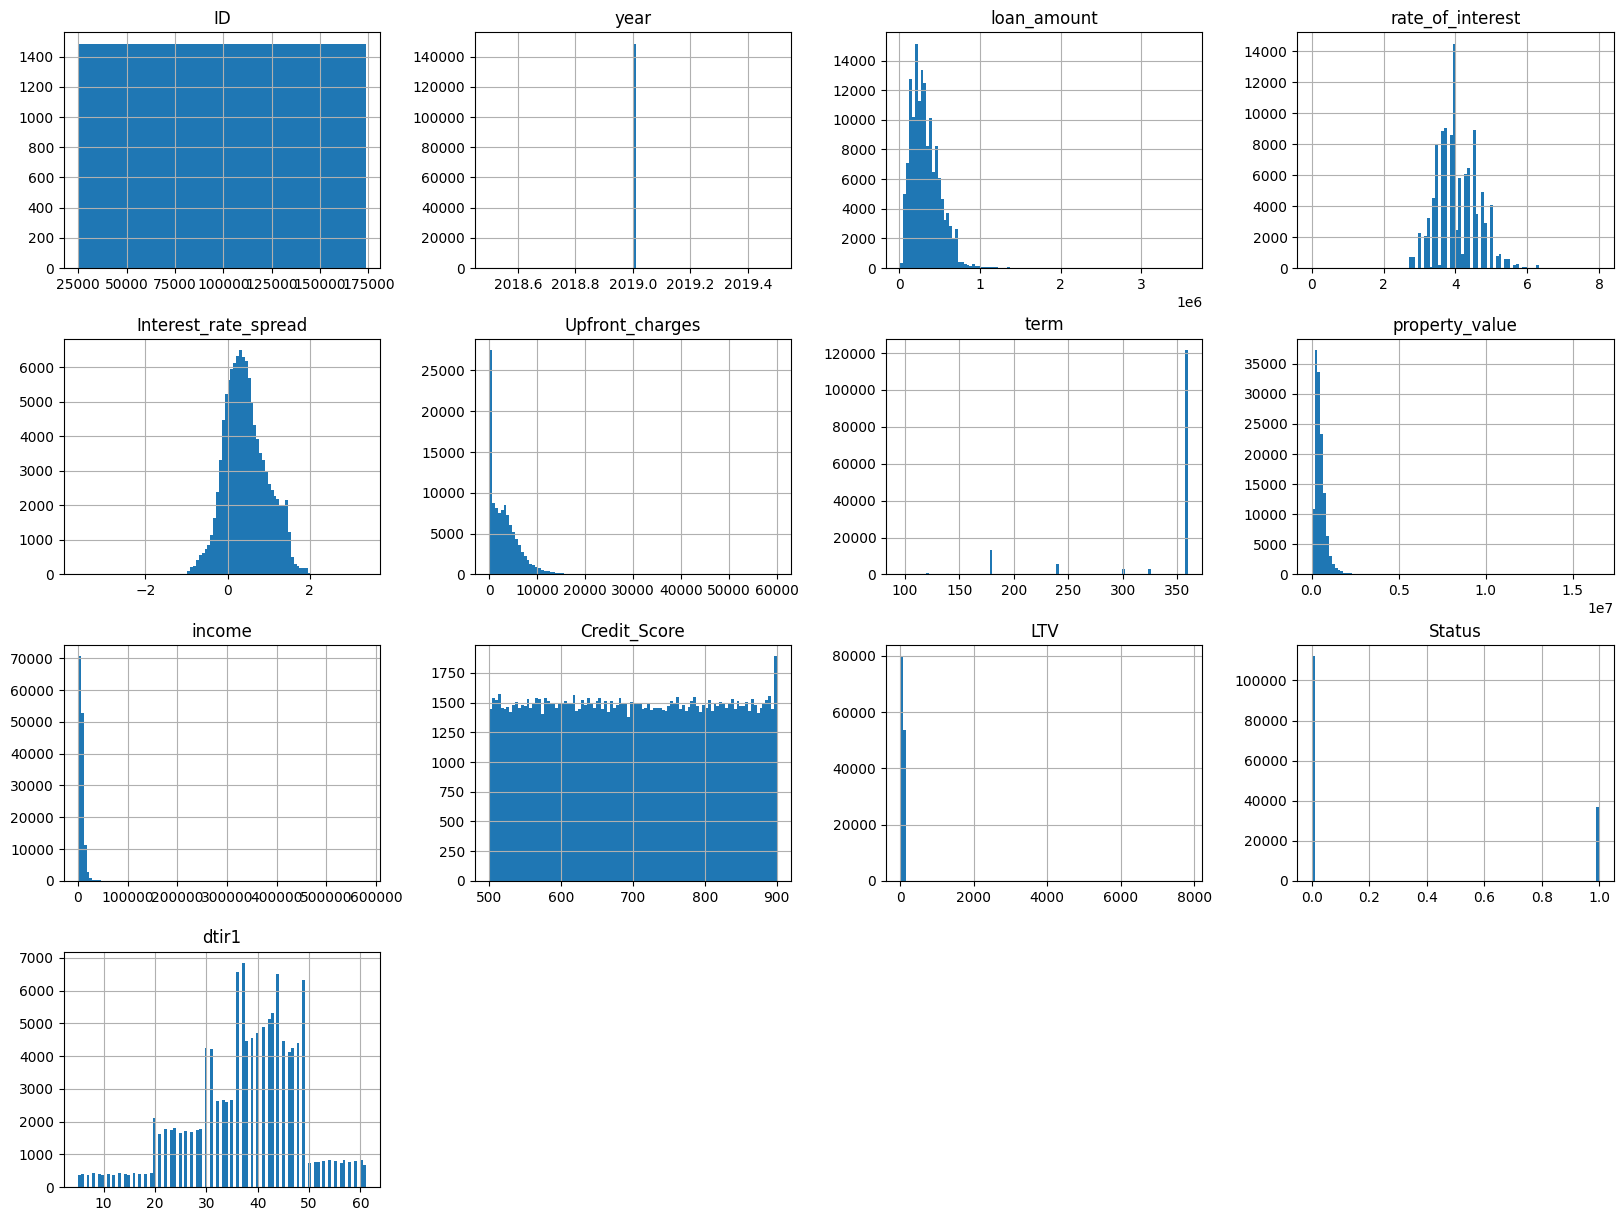

In [9]:
# Checking the data distribution by graphing histograms
df.hist(
    bins = 100,
    figsize = (20, 15)
)

# Data Cleaning and Preprocessing

In [10]:
#removing duplicates

df = df.drop_duplicates()

In [11]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [12]:
#Filling missing values in specific columns with the mode (most frequent value)

df.loan_limit.fillna(df.loan_limit.mode()[0],inplace=True)
df.dtir1.fillna(df.dtir1.mode()[0],inplace=True)
df.LTV.fillna(df.LTV.mode()[0],inplace=True)
df.submission_of_application.fillna(df.submission_of_application.mode()[0],inplace=True)
df.age.fillna(df.age.mode()[0],inplace=True)
df.income.fillna(df.income.mode()[0],inplace=True)
df.property_value.fillna(df.property_value.mode()[0],inplace=True)
df.Neg_ammortization.fillna(df.Neg_ammortization.mode()[0],inplace=True)
df.term.fillna(df.term.mode()[0],inplace=True)
df.approv_in_adv.fillna(df.approv_in_adv.mode()[0],inplace=True)
df.loan_purpose.fillna(df.loan_purpose.mode()[0],inplace=True)
df.rate_of_interest.fillna(df.rate_of_interest.mode()[0],inplace=True)
df.Interest_rate_spread.fillna(df.Interest_rate_spread.mode()[0],inplace=True)
df.Upfront_charges.fillna(df.Upfront_charges.mode()[0],inplace=True)

In [13]:
df.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

# Feature Engineering

In [14]:
#Function to remove outliers in a specific column of the dataframe

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound,df[column])

In [15]:
#creating a copy for visualizations later
df_vis =df.copy()

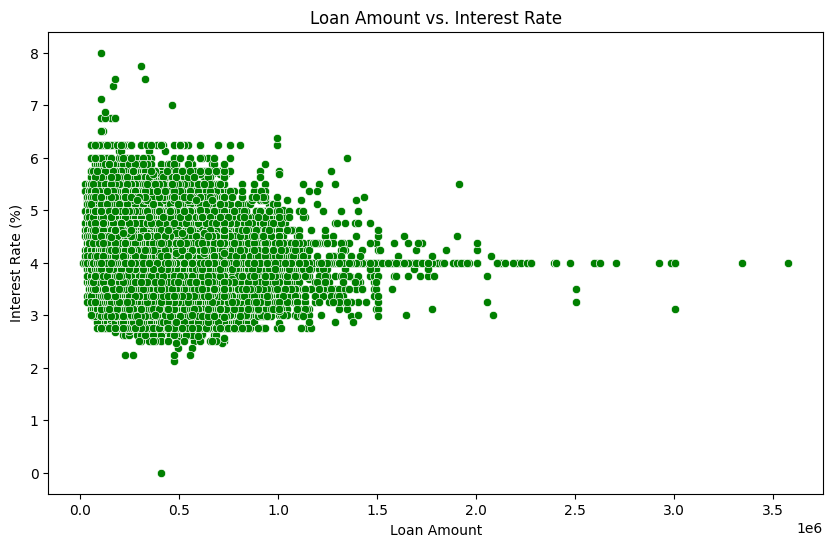

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amount', y='rate_of_interest', data=df_vis, color='green')
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.show()


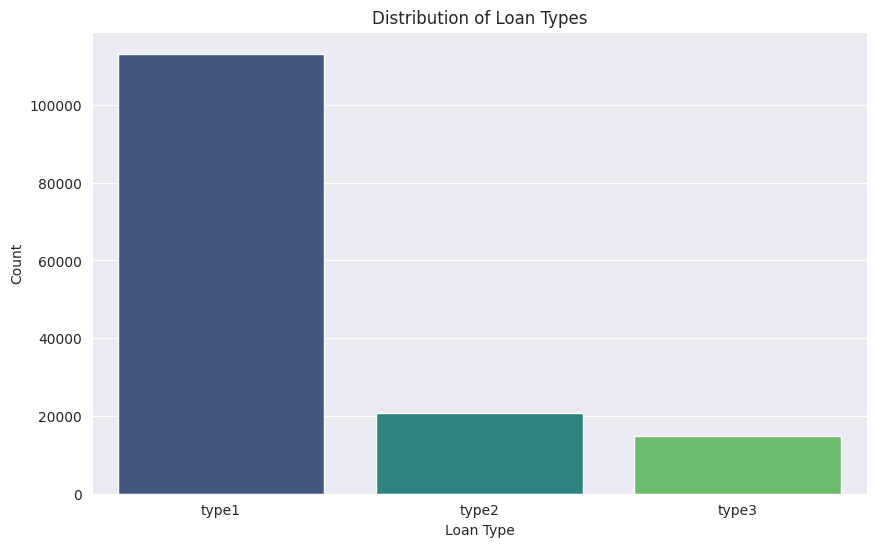

In [17]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_type', data=df_vis, palette='viridis')
plt.title('Distribution of Loan Types')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.show()

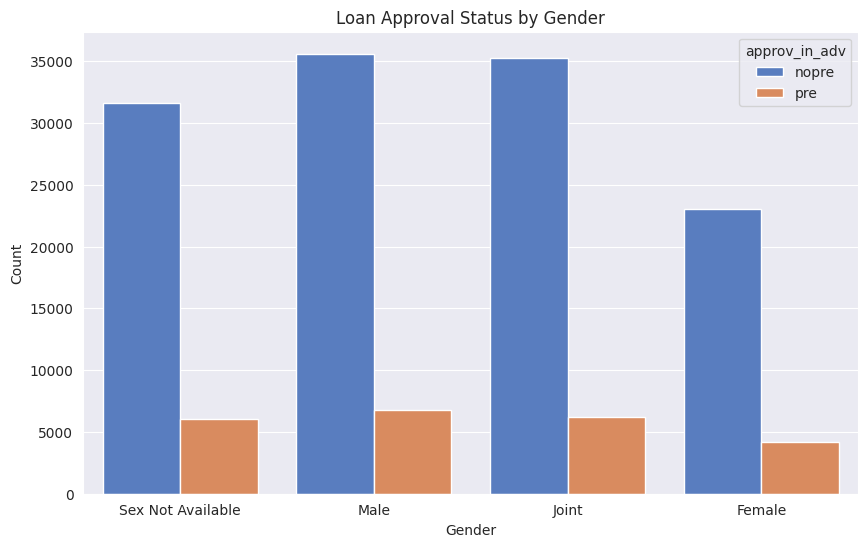

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='approv_in_adv', data=df_vis, palette='muted')
plt.title('Loan Approval Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


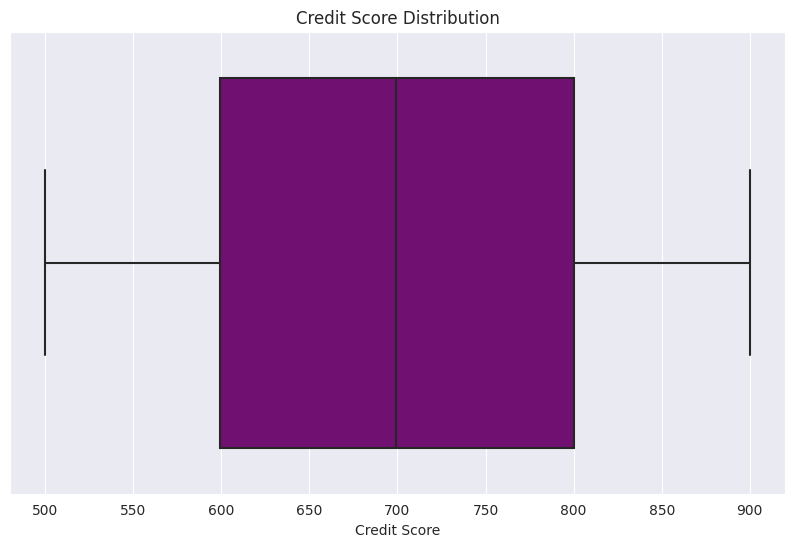

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', data=df_vis, color='purple')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.show()


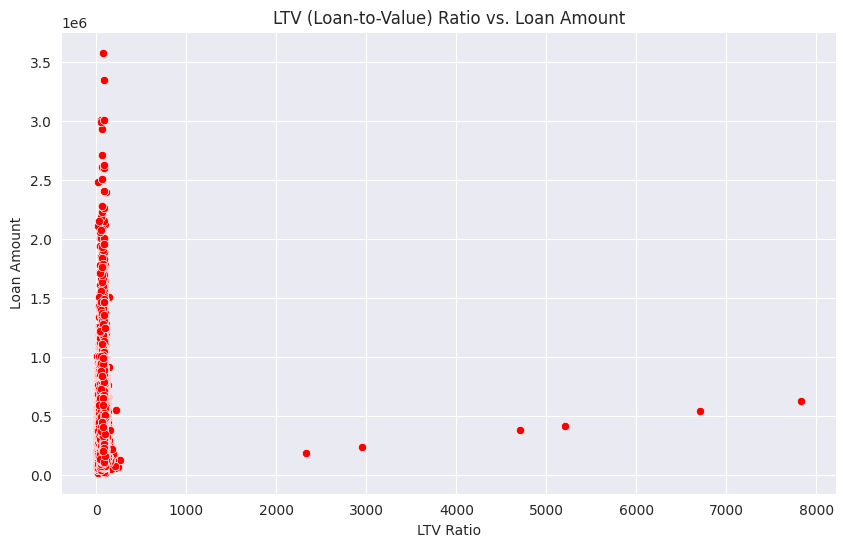

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LTV', y='loan_amount', data=df_vis, color='red')
plt.title('LTV (Loan-to-Value) Ratio vs. Loan Amount')
plt.xlabel('LTV Ratio')
plt.ylabel('Loan Amount')
plt.show()


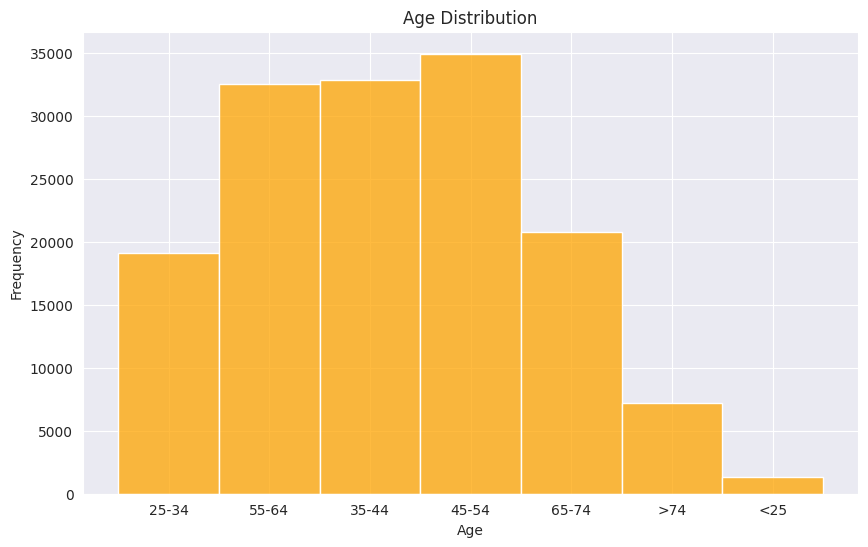

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df_vis['age'],color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


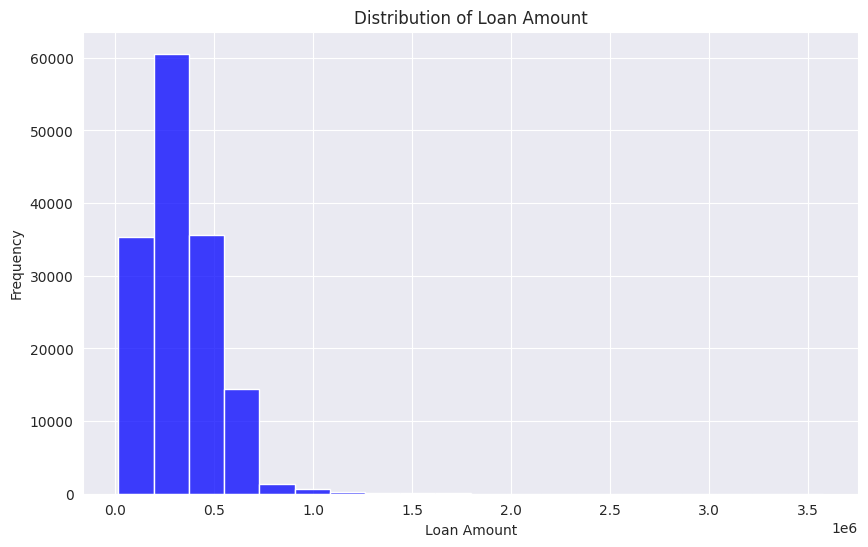

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df_vis['loan_amount'], kde=False, bins=20, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


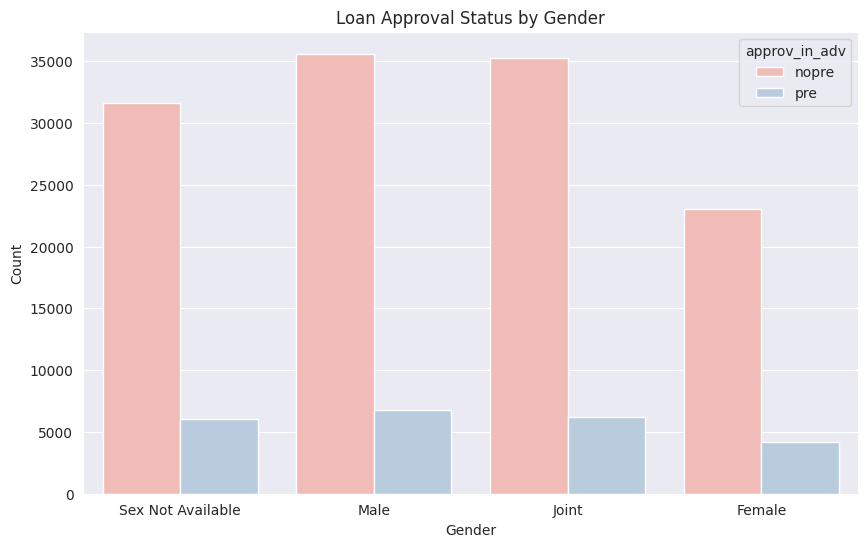

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='approv_in_adv', data=df_vis, palette='Pastel1')
plt.title('Loan Approval Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


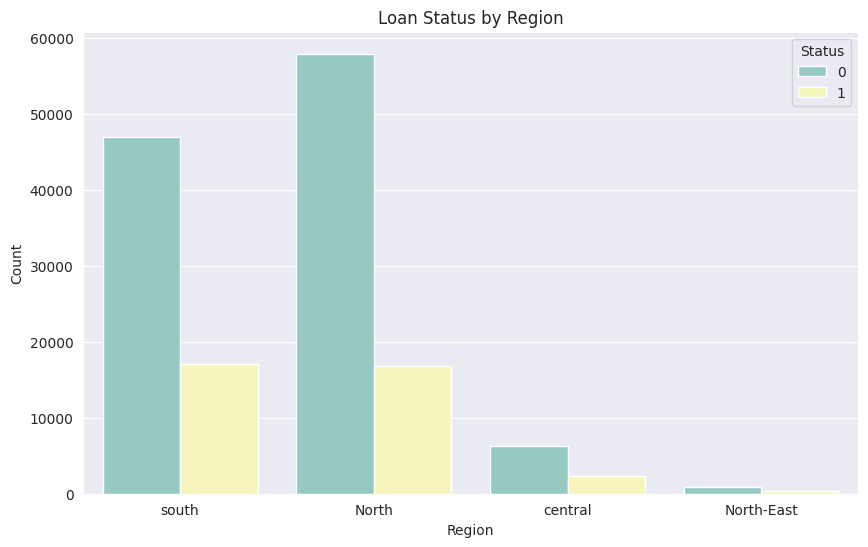

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='Status', data=df_vis, palette='Set3')
plt.title('Loan Status by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

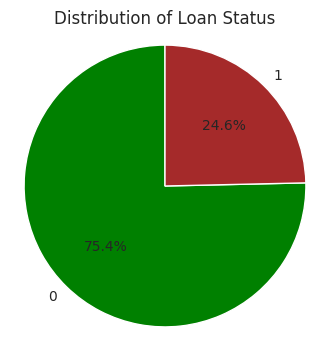

In [25]:
sns.set_style("darkgrid")
status_counts = df_vis['Status'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['green', 'brown'], startangle=90)
plt.title('Distribution of Loan Status')
plt.axis('equal')  
plt.show()

In [26]:
df.Gender.unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [27]:
df.Gender.value_counts()

Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64

## Encoding categorical variables

In [28]:
#Encoding Categorical Variables 

df['Gender'] = df['Gender'].replace('Male', 1, regex=True)
df['Gender'] = df['Gender'].replace('Female', 2, regex=True)
df['Gender'] = df['Gender'].replace('Sex Not Available', 3, regex=True)
df['Gender'] = df['Gender'].replace('Joint', 4, regex=True)

In [29]:
df.loan_limit.unique()

array(['cf', 'ncf'], dtype=object)

In [30]:
df['loan_limit'] = [ 1 if i=='cf' else 0 for i in df['loan_limit']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [31]:
df.approv_in_adv.unique()

array(['nopre', 'pre'], dtype=object)

In [32]:
df['approv_in_adv'] = [ 1 if i=='pre' else 0 for i in df['approv_in_adv']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [33]:
df.loan_type.unique()

array(['type1', 'type2', 'type3'], dtype=object)

In [34]:
df['loan_type'] = df['loan_type'].replace('type1', 1, regex=True)
df['loan_type'] = df['loan_type'].replace('type2', 2, regex=True)
df['loan_type'] = df['loan_type'].replace('type3', 3, regex=True)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [35]:
df.loan_purpose.unique()

array(['p1', 'p4', 'p3', 'p2'], dtype=object)

In [36]:
df['loan_purpose'] = df['loan_purpose'].replace('p1', 1, regex=True)
df['loan_purpose'] = df['loan_purpose'].replace('p2', 2, regex=True)
df['loan_purpose'] = df['loan_purpose'].replace('p3', 3, regex=True)
df['loan_purpose'] = df['loan_purpose'].replace('p4', 4, regex=True)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [37]:
df.Credit_Worthiness.unique()

array(['l1', 'l2'], dtype=object)

In [38]:
df['Credit_Worthiness'] = [ 1 if i=='l1' else 0 for i in df['Credit_Worthiness']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [39]:
df.open_credit.unique()

array(['nopc', 'opc'], dtype=object)

In [40]:
df['open_credit'] = [ 1 if i=='opc' else 0 for i in df['open_credit']]
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [41]:
df.business_or_commercial.unique()

array(['nob/c', 'b/c'], dtype=object)

In [42]:
df['business_or_commercial'] = [ 1 if i=='b/c' else 0 for i in df['business_or_commercial']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [43]:
df.credit_type.unique()

array(['EXP', 'EQUI', 'CRIF', 'CIB'], dtype=object)

In [44]:
df['credit_type'] = df['credit_type'].replace('EXP', 1, regex=True)
df['credit_type'] = df['credit_type'].replace('EQUI', 2, regex=True)
df['credit_type'] = df['credit_type'].replace('CRIF', 3, regex=True)
df['credit_type'] = df['credit_type'].replace('CIB', 4, regex=True)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [45]:
df["co-applicant_credit_type"].unique()


array(['CIB', 'EXP'], dtype=object)

In [46]:
df['co-applicant_credit_type'] = [ 1 if i=='CIB' else 0 for i in df['co-applicant_credit_type']]
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,1,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,0,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,1,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,1,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,0,25-34,not_inst,91.886544,North,direct,0,39.0


In [47]:
df.submission_of_application.unique()

array(['to_inst', 'not_inst'], dtype=object)

In [48]:
df['submission_of_application'] = [ 1 if i=='to_inst' else 0 for i in df['submission_of_application']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,1,25-34,1,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,0,55-64,1,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,1,35-44,1,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,1,45-54,0,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,0,25-34,0,91.886544,North,direct,0,39.0


In [49]:
df.Region.unique()


array(['south', 'North', 'central', 'North-East'], dtype=object)

In [50]:
df['Region'] = df['Region'].replace('south', 1, regex=True)
df['Region'] = df['Region'].replace('North', 2, regex=True)
df['Region'] = df['Region'].replace('central', 3, regex=True)
df['Region'] = df['Region'].replace('North-East', 4, regex=True)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,1,25-34,1,98.728814,1,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,0,55-64,1,81.250000,2,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,1,35-44,1,80.019685,1,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,1,45-54,0,69.376900,2,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,0,25-34,0,91.886544,2,direct,0,39.0


In [51]:
df.Security_Type.unique()

array(['direct', 'Indriect'], dtype=object)

In [52]:
df['Security_Type'] = [ 1 if i=='direct' else 0 for i in df['Security_Type']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,1,25-34,1,98.728814,1,1,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,0,55-64,1,81.250000,2,1,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,1,35-44,1,80.019685,1,1,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,1,45-54,0,69.376900,2,1,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,0,25-34,0,91.886544,2,1,0,39.0


In [53]:
df.age.unique 

<bound method Series.unique of 0         25-34
1         55-64
2         35-44
3         45-54
4         25-34
          ...  
148665    55-64
148666    25-34
148667    45-54
148668    55-64
148669    45-54
Name: age, Length: 148670, dtype: object>

In [54]:
#Label encoding for other categorical columns

label_encoder = preprocessing.LabelEncoder() 

df['age']= label_encoder.fit_transform(df['age']) 

df['construction_type']= label_encoder.fit_transform(df['construction_type']) 

df['occupancy_type']= label_encoder.fit_transform(df['occupancy_type']) 
 
df['interest_only']= label_encoder.fit_transform(df['interest_only']) 

df['Neg_ammortization']= label_encoder.fit_transform(df['Neg_ammortization']) 

df['lump_sum_payment']= label_encoder.fit_transform(df['lump_sum_payment']) 

df['Secured_by']= label_encoder.fit_transform(df['Secured_by']) 

df['total_units']= label_encoder.fit_transform(df['total_units']) 


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  int64  
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  int64  
 5   loan_type                  148670 non-null  int64  
 6   loan_purpose               148670 non-null  int64  
 7   Credit_Worthiness          148670 non-null  int64  
 8   open_credit                148670 non-null  int64  
 9   business_or_commercial     148670 non-null  int64  
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [56]:
#Drop the'Year' and 'ID' column
df = df.drop(columns=["ID"], axis=1)
df = df.drop(columns=["year"], axis=1)

CONSTRUCTING DATA PIPELINES AND SPLITTING DATA INTO TRAIN-TEST SETS

More data cleaning was performed with advanced techniques. After the data is clean, it was prepared for training the models later

In [57]:
num_features = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 
                'term', 'property_value', 'income', 'Credit_Score']
cat_features = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 
                'Credit_Worthiness', 'business_or_commercial', 'credit_type', 'age', 'Region']

# Creating a pipeline to process numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  
    ('std_scaler', StandardScaler())               
])

# Creating a pipeline to process categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),  
    ('cat', cat_pipeline, cat_features)   
])

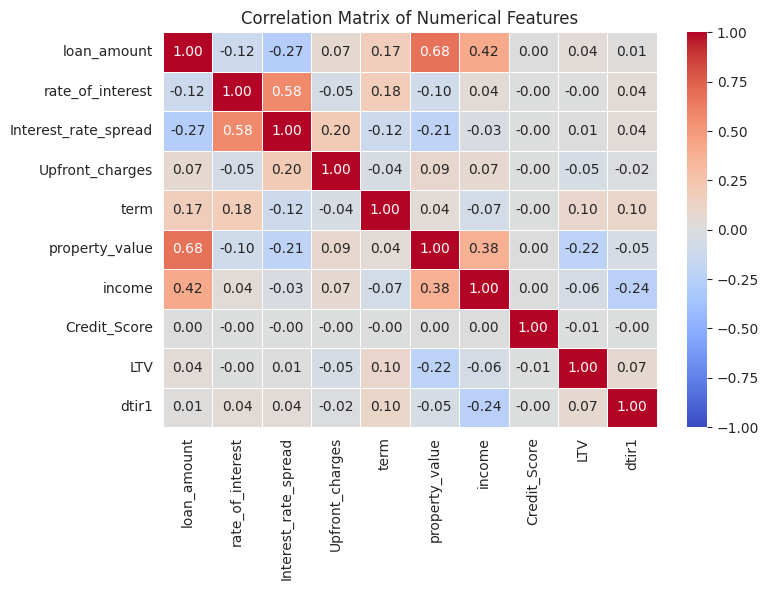

In [58]:
num_features = [
    'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 
    'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1'
]

num_df = df[num_features]
correlation_matrix = num_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


In [59]:
threshold = 0.001

# Computing the correlation matrix
correlation_matrix = df.corr()

high_corr_features = correlation_matrix.index[abs(correlation_matrix["Status"]) > threshold].tolist()

# Removed 'Status' from the list of selected features
high_corr_features.remove("Status")

print("Numerical features selected based on correlation threshold:", high_corr_features)

X_selected = df[high_corr_features]
Y = df["Status"]

cat_features = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 
                'Credit_Worthiness', 'business_or_commercial', 'credit_type', 'age', 'Region']
X_selected = pd.concat([X_selected, df[cat_features]], axis=1)

print("Final selected features (numerical + categorical):")

Numerical features selected based on correlation threshold: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'dtir1']
Final selected features (numerical + categorical):


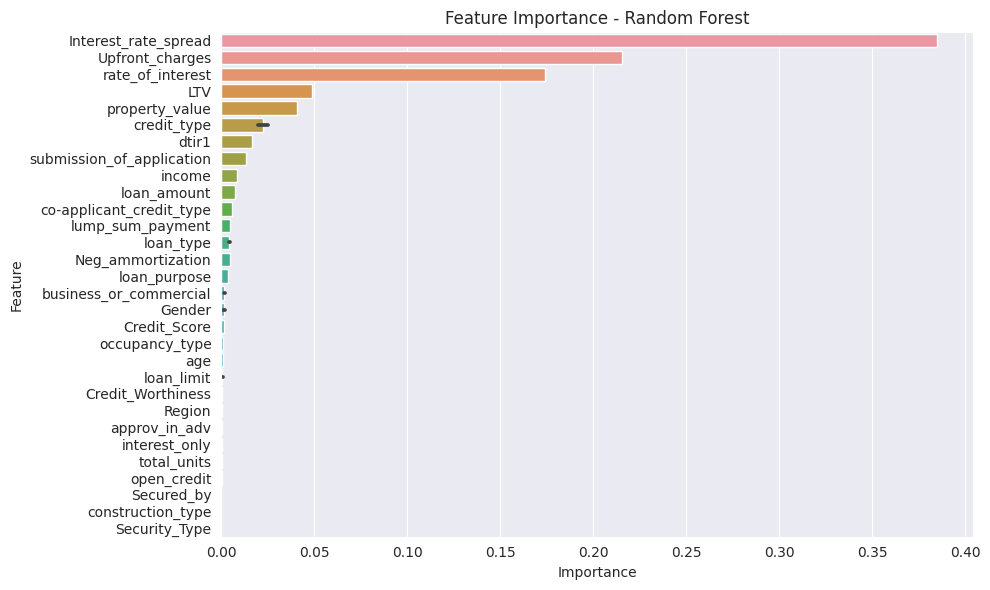


Feature Importance Ranking:
                      Feature  Importance
10       Interest_rate_spread    0.385219
11            Upfront_charges    0.215804
9            rate_of_interest    0.174183
26                        LTV    0.049035
15             property_value    0.040721
21                credit_type    0.024941
37                credit_type    0.019873
29                      dtir1    0.016725
25  submission_of_application    0.013185
20                     income    0.008215
8                 loan_amount    0.007204
23   co-applicant_credit_type    0.005532
14           lump_sum_payment    0.004633
3                   loan_type    0.004595
12          Neg_ammortization    0.004439
33                  loan_type    0.004062
4                loan_purpose    0.003594
34               loan_purpose    0.003447
7      business_or_commercial    0.001846
31                     Gender    0.001834
36     business_or_commercial    0.001586
22               Credit_Score    0.001439
17   

In [60]:
rf_model = RandomForestClassifier(random_state=42)

# Training the Random Forest model
rf_model.fit(X_selected, Y)

# Getting feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X_selected.columns, 
    "Importance": feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
print(feature_importance_df)

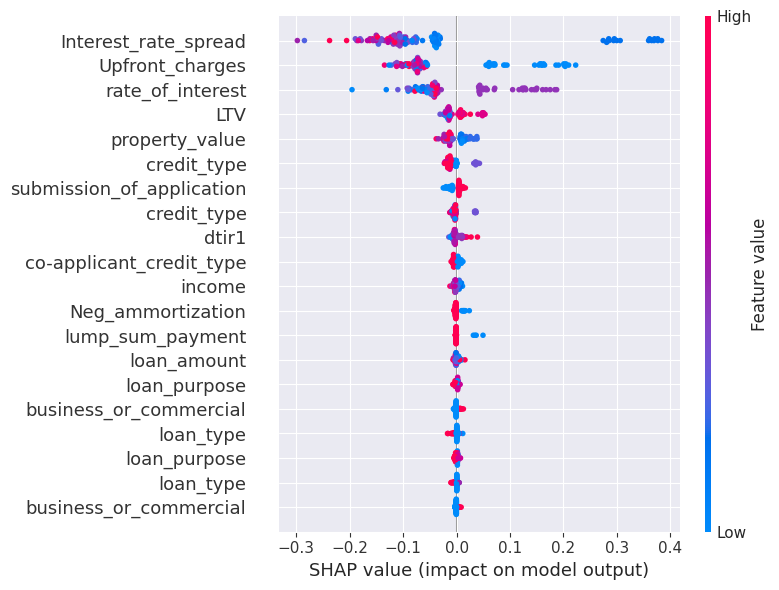

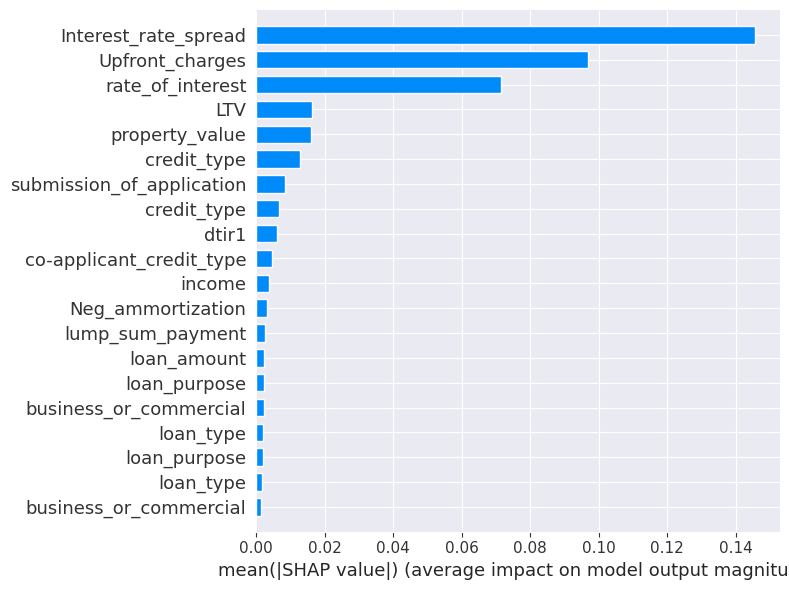

In [61]:
X_sample = X_selected.sample(100, random_state=42)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_sample)  

# ----------------------------
# SHAP Summary Dot Plot
# ----------------------------
shap.summary_plot(shap_values[1], X_sample, show=False, plot_type="dot")

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.tight_layout()
plt.show()

# ----------------------------
# SHAP Summary Bar Plot
# ----------------------------
shap.summary_plot(shap_values[1], X_sample, show=False, plot_type="bar")

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.tight_layout()
plt.show()

In [62]:
#LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_selected.values,
    feature_names=X_selected.columns,
    class_names=[str(cls) for cls in np.unique(Y)],
    mode="classification"
)
lime_exp = explainer_lime.explain_instance(
    X_selected.iloc[42].values,
    rf_model.predict_proba
)

lime_exp.show_in_notebook()

In [63]:
# Define the selected features
selected_features = [
    'Interest_rate_spread', 'Upfront_charges', 'rate_of_interest', 
    'property_value', 'LTV', 'credit_type', 'submission_of_application', 
    'dtir1', 'income', 'loan_amount'
]
X = df[selected_features]  

In [64]:
Y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 148670, dtype: int64

## Model Evaluation

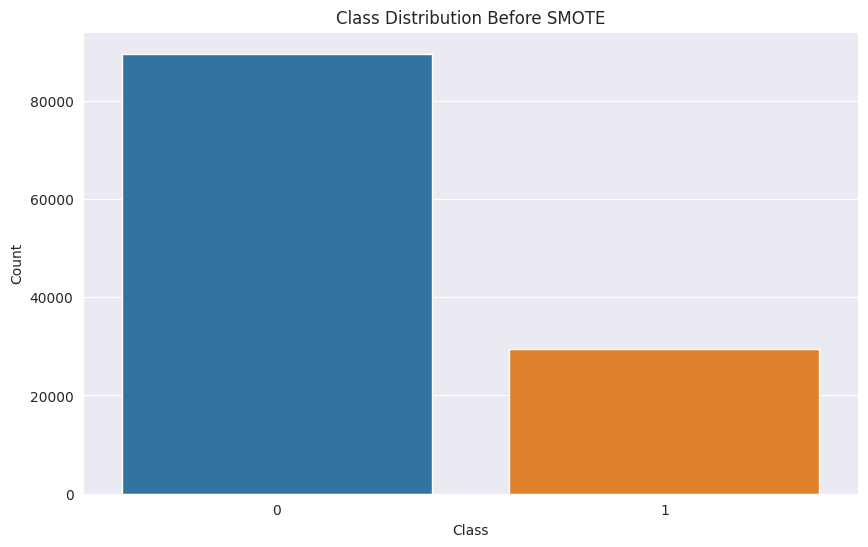

Resampled training data shape: (179074, 10), Status
0    89537
1    89537
Name: count, dtype: int64


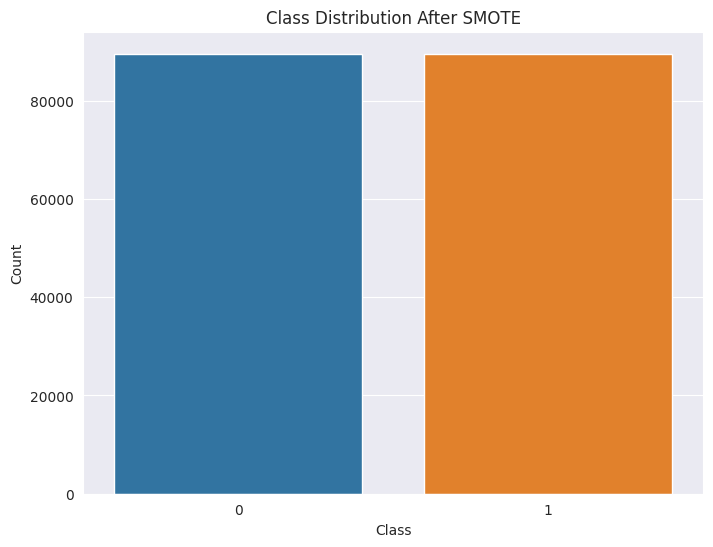

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
sns.countplot(x=Y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Applying SMOTE to the training data to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print(f"Resampled training data shape: {X_train_resampled.shape}, {Y_train_resampled.value_counts()}")

plt.figure(figsize=(8, 6))
sns.countplot(x=Y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  

In [66]:
# Applying PCA to reduce the dimensionality of the feature space
pca = PCA(n_components=0.95)  
X_train_resampled_pca = pca.fit_transform(X_train_resampled_scaled)
X_test_pca = pca.transform(X_test_scaled) 

print(f"Shape of X_train_resampled after PCA: {X_train_resampled_pca.shape}")
print(f"Shape of X_test after PCA: {X_test_pca.shape}")

Shape of X_train_resampled after PCA: (179074, 9)
Shape of X_test after PCA: (29734, 9)


In [67]:
param_grid_lr = {
    'C': np.logspace(-2, 2, 10), 
    'solver': ['liblinear'],  
    'penalty': ['l2'],  
    'max_iter': [100]  
}
lr_model = LogisticRegression(random_state=42)

# Setting up RandomizedSearchCV for Logistic Regression (LR)
random_search_lr = RandomizedSearchCV(lr_model, param_distributions=param_grid_lr, n_iter=20, cv=3, random_state=42, n_jobs=-1)
random_search_lr.fit(X_train_resampled_pca, Y_train_resampled)

print("Best Hyperparameters from RandomizedSearchCV for Logistic Regression (LR):")
print(random_search_lr.best_params_)

Best Hyperparameters from RandomizedSearchCV for Logistic Regression (LR):
{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 100.0}


Training Accuracy for Logistic Regression (LR): 0.9515
Test Accuracy for Logistic Regression (LR): 0.9300

Classification Report (Test Data) for Logistic Regression (LR):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     22494
           1       0.78      0.99      0.87      7240

    accuracy                           0.93     29734
   macro avg       0.89      0.95      0.91     29734
weighted avg       0.94      0.93      0.93     29734



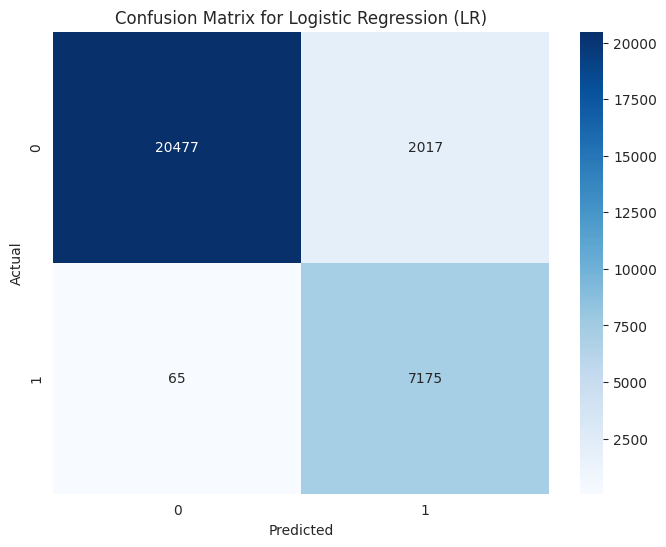

In [68]:
best_lr_model = random_search_lr.best_estimator_

# Training the Logistic Regression model (LR) on the resampled and PCA-reduced training data
best_lr_model.fit(X_train_resampled_pca, Y_train_resampled)
Y_train_pred_lr = best_lr_model.predict(X_train_resampled_pca)
Y_test_pred_lr = best_lr_model.predict(X_test_pca)

train_accuracy_lr = accuracy_score(Y_train_resampled, Y_train_pred_lr)
test_accuracy_lr = accuracy_score(Y_test, Y_test_pred_lr)

print(f"Training Accuracy for Logistic Regression (LR): {train_accuracy_lr:.4f}")
print(f"Test Accuracy for Logistic Regression (LR): {test_accuracy_lr:.4f}")

print("\nClassification Report (Test Data) for Logistic Regression (LR):")
print(classification_report(Y_test, Y_test_pred_lr))
conf_matrix_lr = confusion_matrix(Y_test, Y_test_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for Logistic Regression (LR)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [69]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2', None],  
    'criterion': ['gini', 'entropy'],  
    'random_state': [42]  
}
dt_model = DecisionTreeClassifier(random_state=42)

# Set up RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(dt_model, param_distributions=param_grid_dt, n_iter=20, cv=3, random_state=42, n_jobs=-1)
random_search_dt.fit(X_train_resampled_pca, Y_train_resampled)
print("Best Hyperparameters from RandomizedSearchCV for Decision Tree:")
print(random_search_dt.best_params_)

Best Hyperparameters from RandomizedSearchCV for Decision Tree:
{'random_state': 42, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 50, 'criterion': 'entropy'}


Training Accuracy for Decision Tree (DT): 0.9993
Test Accuracy for Decision Tree (DT): 0.9864

Classification Report (Test Data) for Decision Tree (DT):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22494
           1       0.96      0.98      0.97      7240

    accuracy                           0.99     29734
   macro avg       0.98      0.99      0.98     29734
weighted avg       0.99      0.99      0.99     29734



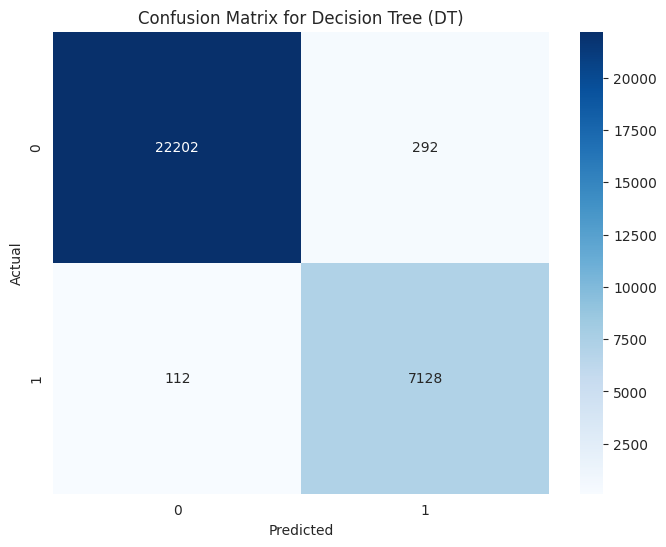

In [70]:
best_dt_model = random_search_dt.best_estimator_

# Training the Decision Tree model (DT) on the resampled and PCA-reduced training data
best_dt_model.fit(X_train_resampled_pca, Y_train_resampled)
Y_train_pred_dt = best_dt_model.predict(X_train_resampled_pca)
Y_test_pred_dt = best_dt_model.predict(X_test_pca)

train_accuracy_dt = accuracy_score(Y_train_resampled, Y_train_pred_dt)
test_accuracy_dt = accuracy_score(Y_test, Y_test_pred_dt)

print(f"Training Accuracy for Decision Tree (DT): {train_accuracy_dt:.4f}")
print(f"Test Accuracy for Decision Tree (DT): {test_accuracy_dt:.4f}")

print("\nClassification Report (Test Data) for Decision Tree (DT):")
print(classification_report(Y_test, Y_test_pred_dt))
conf_matrix_dt = confusion_matrix(Y_test, Y_test_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for Decision Tree (DT)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [71]:
param_grid_rf = {
    'n_estimators': np.arange(10, 101, 10),  
    'max_depth': [5, 10, 15, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['auto', 'sqrt'],  
}
rf_model = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(
    rf_model,
    param_distributions=param_grid_rf,
    n_iter=10,  
    cv=3, 
    random_state=42,
    n_jobs=-1, 
    verbose=1  
)
random_search_rf.fit(X_train_resampled_pca, Y_train_resampled)

print("Best Hyperparameters from RandomizedSearchCV for Random Forest:")
print(random_search_rf.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters from RandomizedSearchCV for Random Forest:
{'n_estimators': 40, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


Training Accuracy for Random Forest (RF): 0.9967
Test Accuracy for Random Forest (RF): 0.9893

Classification Report (Test Data) for Random Forest (RF):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22494
           1       0.96      1.00      0.98      7240

    accuracy                           0.99     29734
   macro avg       0.98      0.99      0.99     29734
weighted avg       0.99      0.99      0.99     29734



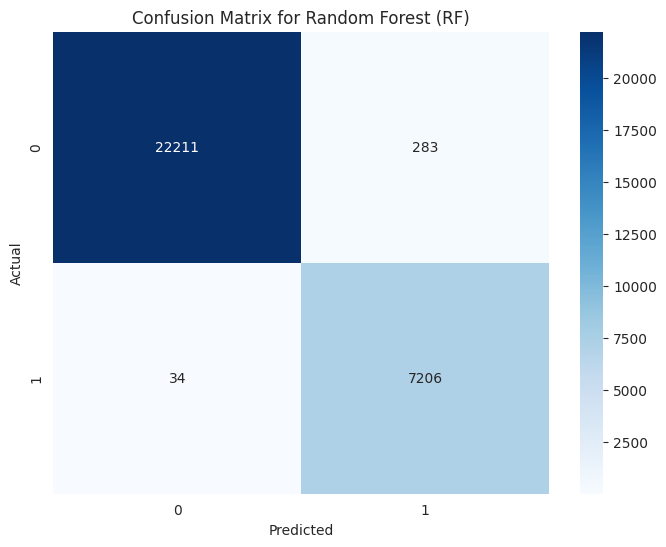

In [72]:
best_rf_model = random_search_rf.best_estimator_

# Traininh the Random Forest model (RF) on the resampled and PCA-reduced training data
best_rf_model.fit(X_train_resampled_pca, Y_train_resampled)
Y_train_pred_rf = best_rf_model.predict(X_train_resampled_pca)
Y_test_pred_rf = best_rf_model.predict(X_test_pca)

train_accuracy_rf = accuracy_score(Y_train_resampled, Y_train_pred_rf)
test_accuracy_rf = accuracy_score(Y_test, Y_test_pred_rf)

print(f"Training Accuracy for Random Forest (RF): {train_accuracy_rf:.4f}")
print(f"Test Accuracy for Random Forest (RF): {test_accuracy_rf:.4f}")
print("\nClassification Report (Test Data) for Random Forest (RF):")
print(classification_report(Y_test, Y_test_pred_rf))
conf_matrix_rf = confusion_matrix(Y_test, Y_test_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for Random Forest (RF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [73]:
param_grid_xgb = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [3, 6, 10],  
    'learning_rate': [0.01, 0.05, 0.1], 
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8],  
    'gamma': [0, 0.1, 0.2],  
    'random_state': [42]  
}

# Initializing the XGBoost model with `tree_method='hist'` for faster training
xgb_model = xgb.XGBClassifier(
    random_state=42,
    tree_method='hist',  
    n_jobs=-1  
)
random_search_xgb = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=10,  
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1  
)
random_search_xgb.fit(X_train_resampled_pca, Y_train_resampled)

print("Best Hyperparameters from RandomizedSearchCV for XGBoost:")
print(random_search_xgb.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters from RandomizedSearchCV for XGBoost:
{'subsample': 0.8, 'random_state': 42, 'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}


[0]	validation_0-logloss:0.62700
[1]	validation_0-logloss:0.57172
[2]	validation_0-logloss:0.53337
[3]	validation_0-logloss:0.48125
[4]	validation_0-logloss:0.43763
[5]	validation_0-logloss:0.40381
[6]	validation_0-logloss:0.37458
[7]	validation_0-logloss:0.35918
[8]	validation_0-logloss:0.33052
[9]	validation_0-logloss:0.30486
[10]	validation_0-logloss:0.28199
[11]	validation_0-logloss:0.26587
[12]	validation_0-logloss:0.24833
[13]	validation_0-logloss:0.23167
[14]	validation_0-logloss:0.21649
[15]	validation_0-logloss:0.20422
[16]	validation_0-logloss:0.19158
[17]	validation_0-logloss:0.17959
[18]	validation_0-logloss:0.17080
[19]	validation_0-logloss:0.16330
[20]	validation_0-logloss:0.15490
[21]	validation_0-logloss:0.14764
[22]	validation_0-logloss:0.14073
[23]	validation_0-logloss:0.13512
[24]	validation_0-logloss:0.13112
[25]	validation_0-logloss:0.12611
[26]	validation_0-logloss:0.12043
[27]	validation_0-logloss:0.11491
[28]	validation_0-logloss:0.11244
[29]	validation_0-loglos

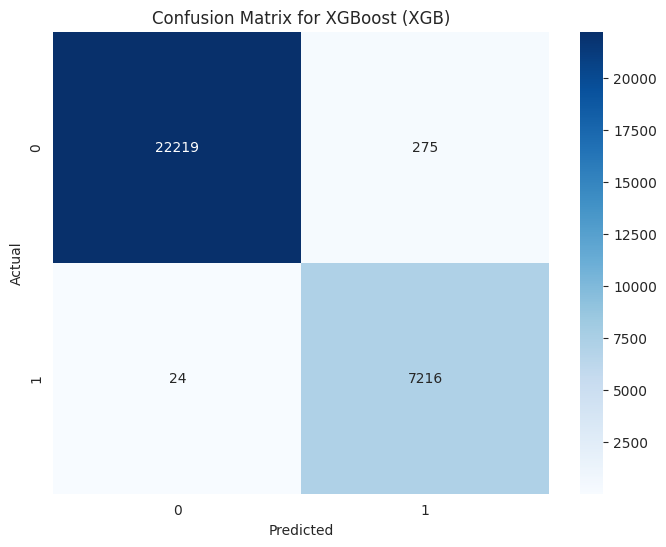

In [74]:
best_xgb_model = random_search_xgb.best_estimator_

# Train the XGBoost model (XGB) and using early stopping to prevent overfitting and speed up training
best_xgb_model.fit(
    X_train_resampled_pca, Y_train_resampled,
    eval_set=[(X_test_pca, Y_test)],  
    early_stopping_rounds=10, 
    verbose=True 
)
Y_train_pred_xgb = best_xgb_model.predict(X_train_resampled_pca)
Y_test_pred_xgb = best_xgb_model.predict(X_test_pca)
train_accuracy_xgb = accuracy_score(Y_train_resampled, Y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(Y_test, Y_test_pred_xgb)

print(f"Training Accuracy for XGBoost (XGB): {train_accuracy_xgb:.4f}")
print(f"Test Accuracy for XGBoost (XGB): {test_accuracy_xgb:.4f}")
print("\nClassification Report (Test Data) for XGBoost (XGB):")
print(classification_report(Y_test, Y_test_pred_xgb))
conf_matrix_xgb = confusion_matrix(Y_test, Y_test_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for XGBoost (XGB)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

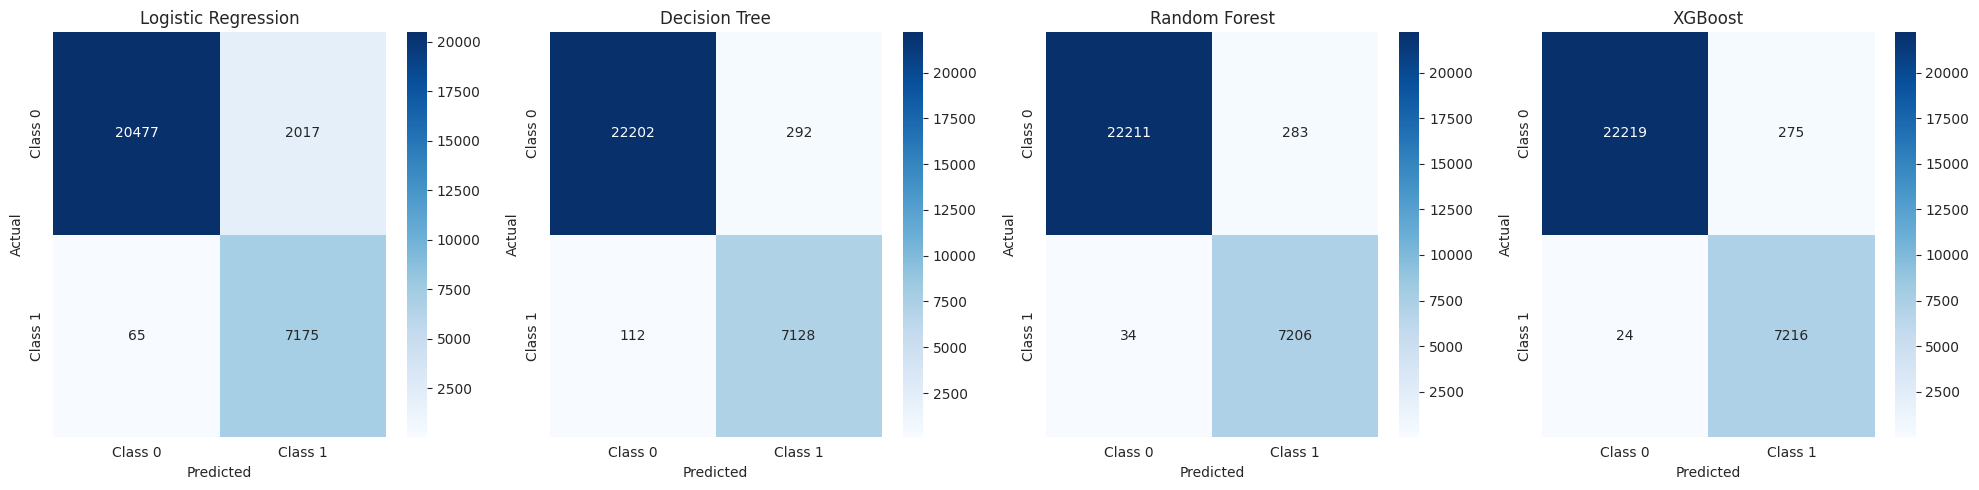

In [75]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Getting the predictions for each model
Y_train_pred_lr = best_lr_model.predict(X_train_resampled_pca)
Y_test_pred_lr = best_lr_model.predict(X_test_pca)

Y_train_pred_dt = best_dt_model.predict(X_train_resampled_pca)
Y_test_pred_dt = best_dt_model.predict(X_test_pca)

Y_train_pred_rf = best_rf_model.predict(X_train_resampled_pca)
Y_test_pred_rf = best_rf_model.predict(X_test_pca)

Y_train_pred_xgb = best_xgb_model.predict(X_train_resampled_pca)
Y_test_pred_xgb = best_xgb_model.predict(X_test_pca)

# Confusion matrices
conf_matrix_lr = confusion_matrix(Y_test, Y_test_pred_lr)
conf_matrix_dt = confusion_matrix(Y_test, Y_test_pred_dt)
conf_matrix_rf = confusion_matrix(Y_test, Y_test_pred_rf)
conf_matrix_xgb = confusion_matrix(Y_test, Y_test_pred_xgb)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[3])
axes[3].set_title('XGBoost')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [76]:
x_train_scaled = X_train_resampled_pca
x_test_scaled = X_test_pca
y_train_cat = Y_train_resampled
y_test_cat = Y_test

# Defining the ANN model with Batch Normalization and Dropout
model = Sequential()

# Inputing Layer and First Hidden Layer
model.add(Dense(units=64, activation='relu', input_dim=x_train_scaled.shape[1]))
model.add(BatchNormalization())  
model.add(Dropout(0.5))  

# Second Hidden Layer
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())  
model.add(Dropout(0.5))  

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_scaled, y_train_cat, epochs=10, batch_size=32, validation_data=(x_test_scaled, y_test_cat))

# Evaluate the model on the test set
y_pred_ann = model.predict(x_test_scaled)
y_pred_ann_classes = (y_pred_ann > 0.5).astype("int32")  # Convert probabilities to class labels (0 or 1)

Epoch 1/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9234 - loss: 0.1960 - val_accuracy: 0.9890 - val_loss: 0.0347
Epoch 2/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9850 - loss: 0.0560 - val_accuracy: 0.9928 - val_loss: 0.0258
Epoch 3/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9876 - loss: 0.0455 - val_accuracy: 0.9937 - val_loss: 0.0223
Epoch 4/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9889 - loss: 0.0418 - val_accuracy: 0.9943 - val_loss: 0.0205
Epoch 5/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9892 - loss: 0.0405 - val_accuracy: 0.9936 - val_loss: 0.0227
Epoch 6/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9902 - loss: 0.0372 - val_accuracy: 0.9940 - val_loss: 0.0205
Epoch 7/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9914 - loss: 0.0332 - val_accuracy: 0.9949 - val_loss: 0.0164
Epoch 8/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9913 - loss: 0


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22494
           1       0.98      1.00      0.99      7240

    accuracy                           1.00     29734
   macro avg       0.99      1.00      0.99     29734
weighted avg       1.00      1.00      1.00     29734



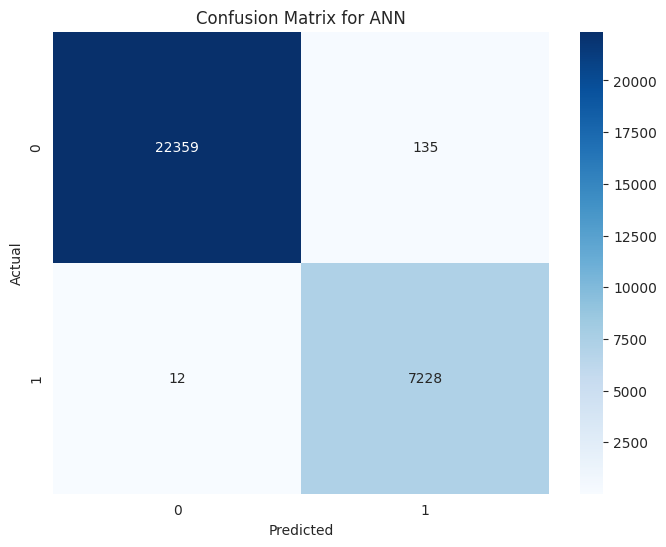

In [77]:
accuracy_ann = accuracy_score(y_test_cat, y_pred_ann_classes)
precision_ann = precision_score(y_test_cat, y_pred_ann_classes, average='macro')  
recall_ann = recall_score(y_test_cat, y_pred_ann_classes, average='macro')
f1_ann = f1_score(y_test_cat, y_pred_ann_classes, average='macro')

print("\nClassification Report (Test Data):")
print(classification_report(y_test_cat, y_pred_ann_classes))
conf_matrix_ann = confusion_matrix(y_test_cat, y_pred_ann_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

5597/5597 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
930/930 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


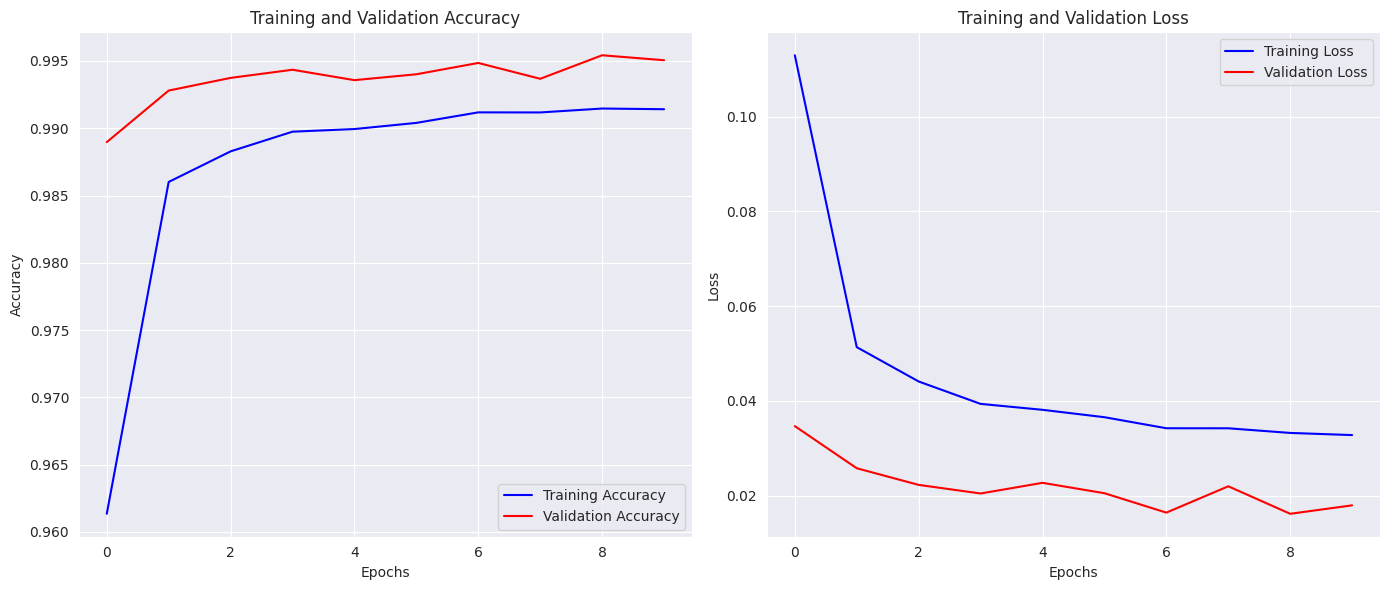

In [78]:
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

# Converting probabilities to class labels
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

# Calculating accuracy for training and test data
train_accuracy = accuracy_score(y_train_cat, y_train_pred_classes)
test_accuracy = accuracy_score(y_test_cat, y_test_pred_classes)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(history.history['loss'], label='Training Loss', color='blue')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='red')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

930/930 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


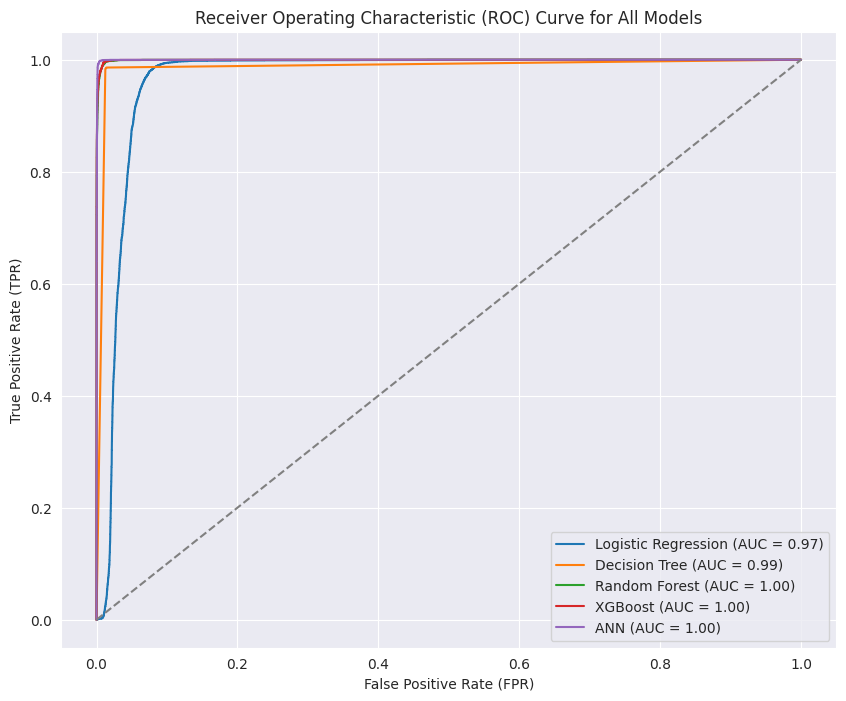

In [79]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'ANN']

# Probabilities for each model
y_test_pred_prob_lr = best_lr_model.predict_proba(X_test_pca)[:, 1]  
y_test_pred_prob_dt = best_dt_model.predict_proba(X_test_pca)[:, 1]
y_test_pred_prob_rf = best_rf_model.predict_proba(X_test_pca)[:, 1]
y_test_pred_prob_xgb = best_xgb_model.predict_proba(X_test_pca)[:, 1]
y_test_pred_prob_ann = model.predict(X_test_pca)[:, 0]  

# ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_test_pred_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_test_pred_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_test_pred_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_test_pred_prob_xgb)
fpr_ann, tpr_ann, _ = roc_curve(Y_test, y_test_pred_prob_ann)

# AUC for each model
auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_ann = auc(fpr_ann, tpr_ann)

plt.figure(figsize=(10, 8))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {auc_ann:.2f})')

# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve for All Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

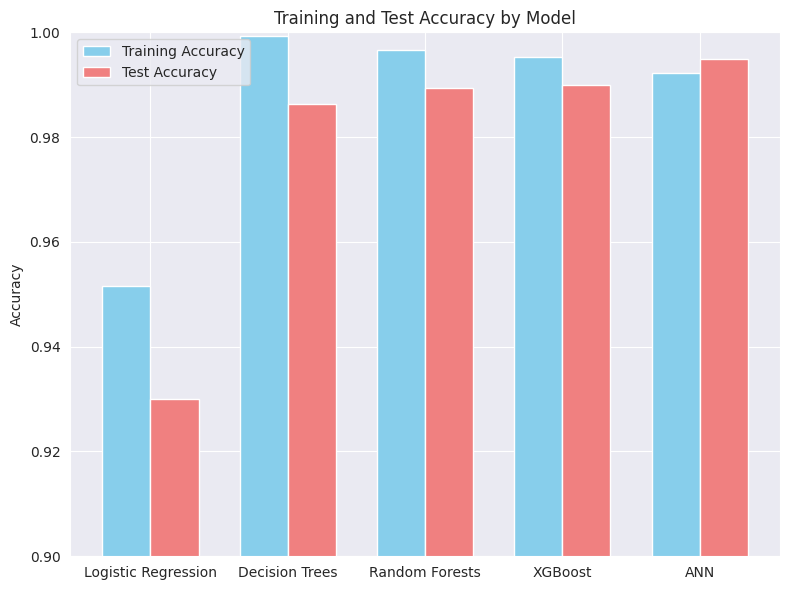

In [80]:
models = ['Logistic Regression', 'Decision Trees', 'Random Forests', 'XGBoost', 'ANN']
training_accuracy = [0.9515, 0.9993, 0.9967, 0.9952, 0.9923]
test_accuracy = [0.9300, 0.9864, 0.9893, 0.9899, 0.9949]

x = np.arange(len(models))  
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, training_accuracy, width, label='Training Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, test_accuracy, width, label='Test Accuracy', color='lightcoral')

ax.set_ylabel('Accuracy')
ax.set_title('Training and Test Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0, ha='center')
ax.set_ylim(0.9, 1.0)
ax.legend()

plt.tight_layout()
plt.show()

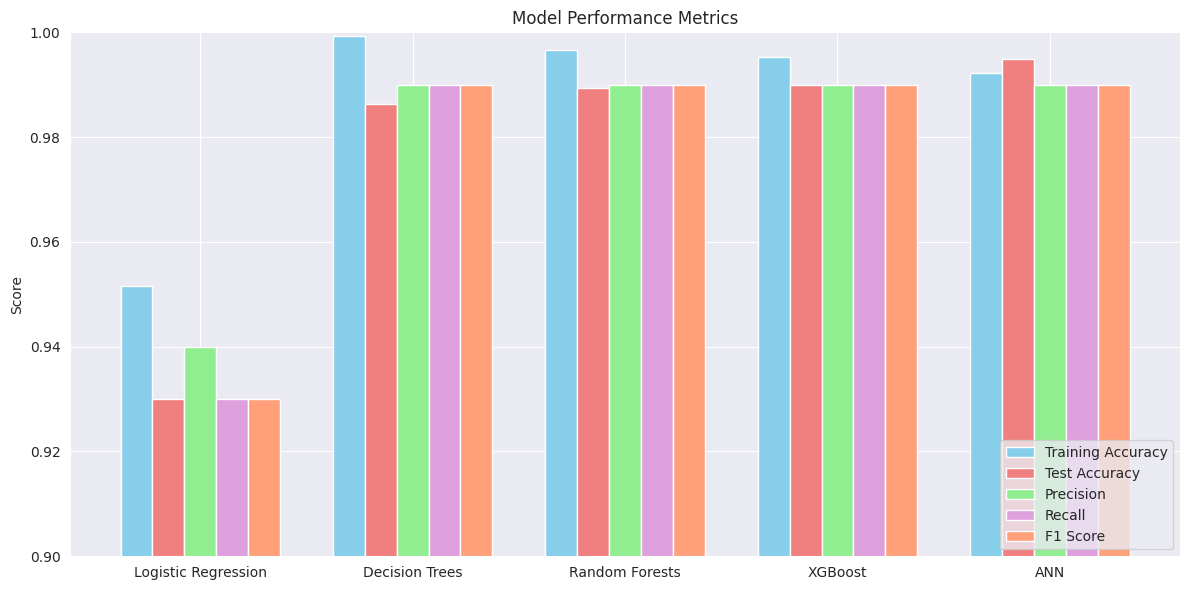

In [81]:
models = ['Logistic Regression', 'Decision Trees', 'Random Forests', 'XGBoost', 'ANN']
training_accuracy = [0.9515, 0.9993, 0.9967, 0.9952, 0.9923]
test_accuracy = [0.9300, 0.9864, 0.9893, 0.9899, 0.9949]
precision = [0.94, 0.99, 0.99, 0.99, 0.99]
recall = [0.93, 0.99, 0.99, 0.99, 0.99]
f1_score = [0.93, 0.99, 0.99, 0.99, 0.99]

# Combine all metrics for grouped bar chart
metrics = [training_accuracy, test_accuracy, precision, recall, f1_score]
metric_labels = ['Training Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'plum', 'lightsalmon']

x = np.arange(len(models))  
width = 0.15  

fig, ax = plt.subplots(figsize=(12, 6))

for i, (metric, label, color) in enumerate(zip(metrics, metric_labels, colors)):
    ax.bar(x + (i - 2)*width, metric, width, label=label, color=color)

ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0, ha='center')
ax.set_ylim(0.9, 1.0)
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [82]:
import joblib
from tensorflow.keras.models import save_model

# Save the ANN model
ann_model_path = 'trained_ann_model.h5'
model.save(ann_model_path)

# Save the Logistic Regression model 
lr_model_path = 'trained_lr_model.pkl'
joblib.dump(best_lr_model, lr_model_path)

# Save the Decision Tree model 
dt_model_path = 'trained_dt_model.pkl'
joblib.dump(best_dt_model, dt_model_path)

# Save the Random Forest model 
rf_model_path = 'trained_rf_model.pkl'
joblib.dump(best_rf_model, rf_model_path)

# Save the XGBoost model 
xgb_model_path = 'trained_xgb_model.pkl'
joblib.dump(best_xgb_model, xgb_model_path)

print("All models have been saved successfully!")

All models have been saved successfully!
